# Business Problem

Who are the stakeholders in this project? Who will be directly affected by the creation of this project?

A NHL team

What business problem(s) will this Data Science project solve for the organization?

An NHL team is looking to determine who is likely, or more likely to suffer a concussion based on past performance and information. 

What problems are inside the scope of this project?

What problems are outside the scope of this project?

What data sources are available to us?

Eliteprospect_scraper package and a csv of nhl injuries

What is the expected timeline for this project? Are there hard deadlines (e.g. "must be live before holiday season shopping") or is this an ongoing project?

Finish bones of project by 1/17/2023

Do stakeholders from different parts of the company or organization all have the exact same understanding about what this project is and isn't?

### Obtain

In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [29]:
df = pd.read_csv("df")
df.head()

,player,team,gp,g,a,tp,ppg,pim,+/-,link,season,league,playername,position,fw_def,Name,Games Missed,Concussion
0,Jaromír Jágr (RW),Pittsburgh Penguins,81,52,69,121,1.49,42,19,https://www.eliteprospects.com/player/8627/jar...,2000-01,nhl,Jaromír Jágr,RW,FW,0,0.0,0
1,Joe Sakic (C),Colorado Avalanche,82,54,64,118,1.44,30,45,https://www.eliteprospects.com/player/8862/joe...,2000-01,nhl,Joe Sakic,C,FW,0,0.0,0
2,Patrik Elias (LW),New Jersey Devils,82,40,56,96,1.17,51,45,https://www.eliteprospects.com/player/8698/pat...,2000-01,nhl,Patrik Elias,LW,FW,0,0.0,0
3,Alexei Kovalev (RW),Pittsburgh Penguins,79,44,51,95,1.2,96,12,https://www.eliteprospects.com/player/8670/ale...,2000-01,nhl,Alexei Kovalev,RW,FW,0,0.0,0
4,Jason Allison (C),Boston Bruins,82,36,59,95,1.16,85,-8,https://www.eliteprospects.com/player/9064/jas...,2000-01,nhl,Jason Allison,C,FW,0,0.0,0


### Scrub

In [30]:
df.columns

Index(['player', 'team', 'gp', 'g', 'a', 'tp', 'ppg', 'pim', '+/-', 'link',
       'season', 'league', 'playername', 'position', 'fw_def', 'Name',
       'Games Missed', 'Concussion'],
      dtype='object')

In [31]:
df.head()

,player,team,gp,g,a,tp,ppg,pim,+/-,link,season,league,playername,position,fw_def,Name,Games Missed,Concussion
0,Jaromír Jágr (RW),Pittsburgh Penguins,81,52,69,121,1.49,42,19,https://www.eliteprospects.com/player/8627/jar...,2000-01,nhl,Jaromír Jágr,RW,FW,0,0.0,0
1,Joe Sakic (C),Colorado Avalanche,82,54,64,118,1.44,30,45,https://www.eliteprospects.com/player/8862/joe...,2000-01,nhl,Joe Sakic,C,FW,0,0.0,0
2,Patrik Elias (LW),New Jersey Devils,82,40,56,96,1.17,51,45,https://www.eliteprospects.com/player/8698/pat...,2000-01,nhl,Patrik Elias,LW,FW,0,0.0,0
3,Alexei Kovalev (RW),Pittsburgh Penguins,79,44,51,95,1.2,96,12,https://www.eliteprospects.com/player/8670/ale...,2000-01,nhl,Alexei Kovalev,RW,FW,0,0.0,0
4,Jason Allison (C),Boston Bruins,82,36,59,95,1.16,85,-8,https://www.eliteprospects.com/player/9064/jas...,2000-01,nhl,Jason Allison,C,FW,0,0.0,0


In [32]:
df["season"].unique()


array(['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06',
       '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12',
       '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18',
       '2018-19', '2019-20', '2020-21'], dtype=object)

In [33]:
df.head()

,player,team,gp,g,a,tp,ppg,pim,+/-,link,season,league,playername,position,fw_def,Name,Games Missed,Concussion
0,Jaromír Jágr (RW),Pittsburgh Penguins,81,52,69,121,1.49,42,19,https://www.eliteprospects.com/player/8627/jar...,2000-01,nhl,Jaromír Jágr,RW,FW,0,0.0,0
1,Joe Sakic (C),Colorado Avalanche,82,54,64,118,1.44,30,45,https://www.eliteprospects.com/player/8862/joe...,2000-01,nhl,Joe Sakic,C,FW,0,0.0,0
2,Patrik Elias (LW),New Jersey Devils,82,40,56,96,1.17,51,45,https://www.eliteprospects.com/player/8698/pat...,2000-01,nhl,Patrik Elias,LW,FW,0,0.0,0
3,Alexei Kovalev (RW),Pittsburgh Penguins,79,44,51,95,1.2,96,12,https://www.eliteprospects.com/player/8670/ale...,2000-01,nhl,Alexei Kovalev,RW,FW,0,0.0,0
4,Jason Allison (C),Boston Bruins,82,36,59,95,1.16,85,-8,https://www.eliteprospects.com/player/9064/jas...,2000-01,nhl,Jason Allison,C,FW,0,0.0,0


In [34]:
# look for missing values
df.isnull().sum()

player          0
team            0
gp              0
g               0
a               0
tp              0
ppg             0
pim             0
+/-             0
link            0
season          0
league          0
playername      0
position        0
fw_def          0
Name            0
Games Missed    0
Concussion      0
dtype: int64

In [35]:
# remove duplicate values - there are not duplicate values to remove
duplicates = df[df.duplicated()]
duplicates

,player,team,gp,g,a,tp,ppg,pim,+/-,link,season,league,playername,position,fw_def,Name,Games Missed,Concussion


In [36]:
# check for outliers using a box plot
# df.boxplot()
# plt.show()

In [37]:
# df_numeric = df.select_dtypes(include=[np.number])
# z = np.abs(stats.zscore(df_numeric))
# print(df[(z > 3).any(axis=1)])

In [38]:
# rename columns
df.rename(columns={'gp': 'games_played', 'g': 'goals', 'a': 'assists',
                   'tp': 'total_points', 'ppg': 'points_per_game', 'pim': 'penalty_minutes',
                  '+/-': 'team_goal_differential', 'playername': 'player_name', 'fw_def': 'forward_defense',
                  'Name': 'name', 'Games Missed': 'games_missed', 'Concussion': 'concussion'}, inplace=True)


In [39]:
# view updated column names
df.columns

Index(['player', 'team', 'games_played', 'goals', 'assists', 'total_points',
       'points_per_game', 'penalty_minutes', 'team_goal_differential', 'link',
       'season', 'league', 'player_name', 'position', 'forward_defense',
       'name', 'games_missed', 'concussion'],
      dtype='object')

In [40]:
# drop unnecessary columns
df.drop(columns=['player', 'link', 'name', 'season', 'forward_defense', 'games_missed'], axis=1, inplace=True)

In [41]:
df.head()

,team,games_played,goals,assists,total_points,points_per_game,penalty_minutes,team_goal_differential,league,player_name,position,concussion
0,Pittsburgh Penguins,81,52,69,121,1.49,42,19,nhl,Jaromír Jágr,RW,0
1,Colorado Avalanche,82,54,64,118,1.44,30,45,nhl,Joe Sakic,C,0
2,New Jersey Devils,82,40,56,96,1.17,51,45,nhl,Patrik Elias,LW,0
3,Pittsburgh Penguins,79,44,51,95,1.2,96,12,nhl,Alexei Kovalev,RW,0
4,Boston Bruins,82,36,59,95,1.16,85,-8,nhl,Jason Allison,C,0


In [42]:
# view unique valaues in 'league' column. 
df['league'].unique().sum()

'nhl'

In [43]:
# drop player_name and league from the dataframe. The column, 'player_name' is not needed and 'league' has only one value
df.drop(columns=['player_name', 'league'], axis=1, inplace=True)

In [44]:
df.shape

(18692, 10)

In [45]:
df.describe()

,games_played,goals,assists,total_points,concussion
count,18692.000000,18692.000000,18692.000000,18692.000000,18692.000000
mean,47.958485,7.373368,12.538680,19.912155,0.033169
std,28.509130,8.777233,12.974665,20.598373,0.179083
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,2.000000,3.000000,0.000000
50%,55.000000,4.000000,9.000000,13.000000,0.000000
75%,75.000000,11.000000,19.000000,31.000000,0.000000
max,85.000000,65.000000,96.000000,128.000000,1.000000


In [46]:
df['position'].unique()

array(['RW', 'C', 'LW', 'D', 'LW/RW', 'RW/LW', 'W/C', 'C/LW', 'C/RW',
       'RW/C', 'LW/C', 'D/RW', 'D/LW', 'D/C', 'RW/D', 'C/W', 'C/D', 'F',
       'LW/D', 'D/W'], dtype=object)

In [47]:
# view df data types
df.dtypes

team                      object
games_played               int64
goals                      int64
assists                    int64
total_points               int64
points_per_game           object
penalty_minutes           object
team_goal_differential    object
position                  object
concussion                 int64
dtype: object

In [48]:
df.head(2)

,team,games_played,goals,assists,total_points,points_per_game,penalty_minutes,team_goal_differential,position,concussion
0,Pittsburgh Penguins,81,52,69,121,1.49,42,19,RW,0
1,Colorado Avalanche,82,54,64,118,1.44,30,45,C,0


In [49]:
#df['points_per_game'] = df['points_per_game'].astype(float)

In [50]:
columns = ['points_per_game', 'penalty_minutes', 'team_goal_differential']
for column in columns:
    df = df[df[column] != '-']
    df[column] = df[column].astype(float)

In [51]:
df.dtypes

team                       object
games_played                int64
goals                       int64
assists                     int64
total_points                int64
points_per_game           float64
penalty_minutes           float64
team_goal_differential    float64
position                   object
concussion                  int64
dtype: object

In [56]:
# dummy categorical columns
# Get list of all categorical columns

categorical_columns = df.select_dtypes(include=['object']).columns

# Dummy all categorical columns
for column in categorical_columns:
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df.drop(column, axis=1, inplace=True)

In [57]:
df.head()

,games_played,goals,assists,total_points,points_per_game,penalty_minutes,team_goal_differential,concussion,team_Anaheim Ducks,team_Arizona Coyotes,...,position_F,position_LW,position_LW/C,position_LW/D,position_LW/RW,position_RW,position_RW/C,position_RW/D,position_RW/LW,position_W/C
0,81,52,69,121,1.49,42.0,19.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,82,54,64,118,1.44,30.0,45.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,82,40,56,96,1.17,51.0,45.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,79,44,51,95,1.20,96.0,12.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,82,36,59,95,1.16,85.0,-8.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df.columns

Index(['games_played', 'goals', 'assists', 'total_points', 'points_per_game',
       'penalty_minutes', 'team_goal_differential', 'concussion',
       'team_Anaheim Ducks', 'team_Arizona Coyotes', 'team_Atlanta Thrashers',
       'team_Boston Bruins', 'team_Buffalo Sabres', 'team_Calgary Flames',
       'team_Carolina Hurricanes', 'team_Chicago Blackhawks',
       'team_Colorado Avalanche', 'team_Columbus Blue Jackets',
       'team_Dallas Stars', 'team_Detroit Red Wings', 'team_Edmonton Oilers',
       'team_Florida Panthers', 'team_Los Angeles Kings',
       'team_Mighty Ducks of Anaheim', 'team_Minnesota Wild',
       'team_Montréal Canadiens', 'team_Nashville Predators',
       'team_New Jersey Devils', 'team_New York Islanders',
       'team_New York Rangers', 'team_Ottawa Senators',
       'team_Philadelphia Flyers', 'team_Phoenix Coyotes',
       'team_Pittsburgh Penguins', 'team_San Jose Sharks',
       'team_St. Louis Blues', 'team_Tampa Bay Lightning',
       'team_Toronto Ma

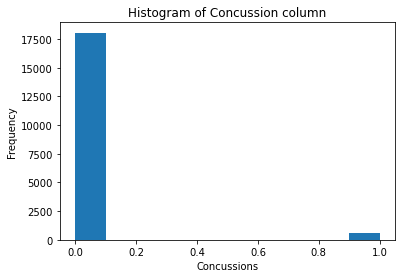

In [62]:
# histogram
# create a histogram of the 'col1' column
plt.hist(df['concussion'])

# add labels and title to the plot
plt.xlabel('Concussions')
plt.ylabel('Frequency')
plt.title('Histogram of Concussion column')

# display the plot
plt.show()

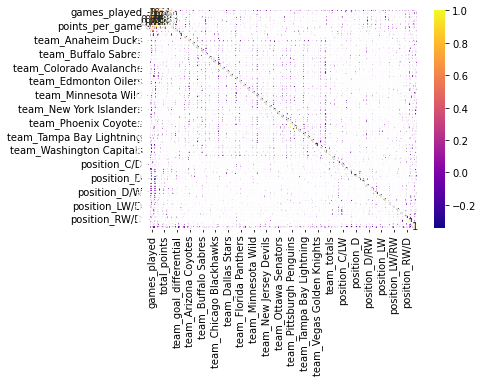

In [63]:
# heatmap of dataframe

# create a correlation matrix from the dataFrame
corr_matrix = df.corr()

# create a heatmap from the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='plasma' )

# display the heatmap
plt.show()

# Data Understanding

What data is available to us? Where does it live? Do we have the data, or can we scrape/buy/source the data from somewhere else?
Who controls the data sources, and what steps are needed to get access to the data?
What is our target?
What predictors are available to us?
What data types are the predictors we'll be working with?
What is the distribution of our data?
How many observations does our dataset contain? Do we have a lot of data? Only a little?
Do we have enough data to build a model? Will we need to use resampling methods?
How do we know the data is correct? How is the data collected? Is there a chance the data could be wrong?

# Data Preparation

Detecting and dealing with missing values
Data type conversions (e.g. numeric data mistakenly encoded as strings)
Checking for and removing multicollinearity (correlated predictors)
Normalizing our numeric data
Converting categorical data to numeric format through one-hot encodin

# Modeling 

Detecting and dealing with missing values
Data type conversions (e.g. numeric data mistakenly encoded as strings)
Checking for and removing multicollinearity (correlated predictors)
Normalizing our numeric data
Converting categorical data to numeric format through one-hot encodin

# Evaluation

During this step, we'll evaluate the results of our modeling efforts. Does our model solve the problems that we outlined all the way back during step 1? Why or why not?

# 1. Obtain

# 2. Scrub

# 3. Explore

# 4. Model

# 5. Interpret